![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

# **HOW TO MAKE AN HISTOGRAM FOR FINANCIAL RETURNS?**

## **Histogram**

<font size="3"> A histogram is a graph used to represent the frequency distribution of a few data points of one variable. We will show how to make an histogram for financial returns in this notebook. To construct a histogram, the first step is to "bin" (or "bucket") the range of values— divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) are adjacent and are typically (but not required to be) of equal size. Histograms give a rough sense of the density of the underlying distribution of the data, and often for density estimation: estimating the probability density function of the underlying variable. The total area of a histogram used for probability density is always normalized to 1. If the length of the intervals on the x-axis are all 1, then a histogram is identical to a relative frequency plot. The area of each block is the fraction of the total that each category represents, and the total area of all the bars is equal to 1 in the unit area histogram.<br><br> 
    
<font size="3"> In this notebook we will use Yahoo Finance Data for 10Y treasury yields and then calculate daily changes in basis points. Then we will use the displot function from seaborn to plot the results. If you want to know how to download the data from the yahoo finance API please take a look  <a href="https://quant-trading.co/how-to-download-data-from-yahoo-finance-api/" target="_blank">here</a>
<br><br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns
import datetime
import yfinance as yf
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, PercentFormatter

## **Download the data**

<font size="3"> We do as usual with the yahoo finance API. 
<br><br>

In [2]:
Ticker = '^TNX'
my_ticker = yf.Ticker(Ticker)

#DATES
start_date = datetime.datetime(2023, 12, 31)
end_date = datetime.datetime(2024, 4, 15)

prices_hist = my_ticker.history(start=start_date,end=end_date)
prices_hist.reset_index(inplace=True)

prices_hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-01-02,3.969,3.973,3.918,3.946,0,0,0
1,2024-01-03,3.978,4.008,3.894,3.907,0,0,0
2,2024-01-04,3.974,4.006,3.971,3.991,0,0,0
3,2024-01-05,4.038,4.099,3.953,4.042,0,0,0
4,2024-01-08,4.059,4.063,3.966,4.002,0,0,0
...,...,...,...,...,...,...,...,...
66,2024-04-08,4.458,4.462,4.406,4.424,0,0,0
67,2024-04-09,4.384,4.396,4.358,4.366,0,0,0
68,2024-04-10,4.346,4.568,4.344,4.560,0,0,0
69,2024-04-11,4.576,4.591,4.515,4.576,0,0,0


## **Calculate daily changes in basis points and also max and min changes**

   
<font size="3"> We will use the shift function as we learnt <a href="https://quant-trading.co/mean-and-median-return-calculations-using-python/" target="_blank">here</a>  
    
<br><br>

In [3]:
prices_hist['Change'] = prices_hist['Close'] - prices_hist['Close'].shift(1)
prices_hist['Change'] = prices_hist['Change']*100
prices_hist.dropna(inplace=True)
prices_hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Change
1,2024-01-03,3.978,4.008,3.894,3.907,0,0,0,-3.900003
2,2024-01-04,3.974,4.006,3.971,3.991,0,0,0,8.399987
3,2024-01-05,4.038,4.099,3.953,4.042,0,0,0,5.099988
4,2024-01-08,4.059,4.063,3.966,4.002,0,0,0,-3.999996
5,2024-01-09,4.047,4.053,3.996,4.019,0,0,0,1.700020
...,...,...,...,...,...,...,...,...,...
66,2024-04-08,4.458,4.462,4.406,4.424,0,0,0,4.600000
67,2024-04-09,4.384,4.396,4.358,4.366,0,0,0,-5.799961
68,2024-04-10,4.346,4.568,4.344,4.560,0,0,0,19.399977
69,2024-04-11,4.576,4.591,4.515,4.576,0,0,0,1.600027


In [4]:
min_value = prices_hist['Change'].min()
max_value = prices_hist['Change'].max()

## **Create the histogram**

   
<font size="3"> We will use the distplot function of the seaborn library. Below you can find an example on how to do that.
<br><br>

Text(19.39997673034668, -0.02, 'Source: Yahoo Finance')

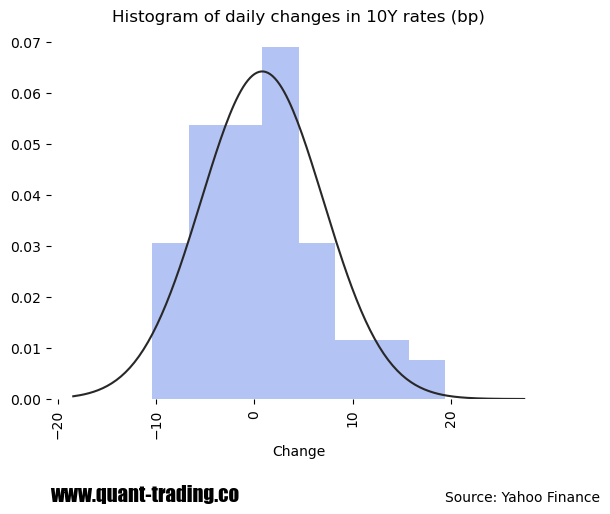

In [5]:
fig = plt.figure()

sns.distplot(prices_hist['Change'], fit = stats.norm,  kde=False, color = "royalblue")
plt.xticks(rotation=90)
plt.title("Histogram of daily changes in 10Y rates (bp)")
plt.box(on=None)

plt.text(min_value*2, -0.02,'www.quant-trading.co' , color='black', fontsize=15,family='Impact')
plt.text(max_value, -0.02,'Source: Yahoo Finance' , color='black', fontsize=10)

## **Let's compare the data using a longer time series**

   
<font size="3"> So far, we did the histogram using data only from the year 2024. Now we will get a longer times series. Let's go back almost 20 years in time and see how the new histogram looks like
<br><br>

In [6]:
#DATES
start_date = datetime.datetime(2003, 12, 31)
end_date = datetime.datetime(2024, 4, 15)

prices_hist2 = my_ticker.history(start=start_date,end=end_date)
prices_hist2.reset_index(inplace=True)

prices_hist2['Change'] = prices_hist2['Close'] - prices_hist2['Close'].shift(1)
prices_hist2['Change'] = prices_hist2['Change']*100
prices_hist2.dropna(inplace=True)
prices_hist2

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Change
1,2004-01-02,4.272,4.403,4.270,4.373,0,0,0,11.600018
2,2004-01-05,4.369,4.418,4.369,4.387,0,0,0,1.399994
3,2004-01-06,4.342,4.358,4.257,4.277,0,0,0,-11.000013
4,2004-01-07,4.300,4.316,4.224,4.246,0,0,0,-3.100014
5,2004-01-08,4.274,4.286,4.230,4.249,0,0,0,0.300026
...,...,...,...,...,...,...,...,...,...
5094,2024-04-08,4.458,4.462,4.406,4.424,0,0,0,4.600000
5095,2024-04-09,4.384,4.396,4.358,4.366,0,0,0,-5.799961
5096,2024-04-10,4.346,4.568,4.344,4.560,0,0,0,19.399977
5097,2024-04-11,4.576,4.591,4.515,4.576,0,0,0,1.600027


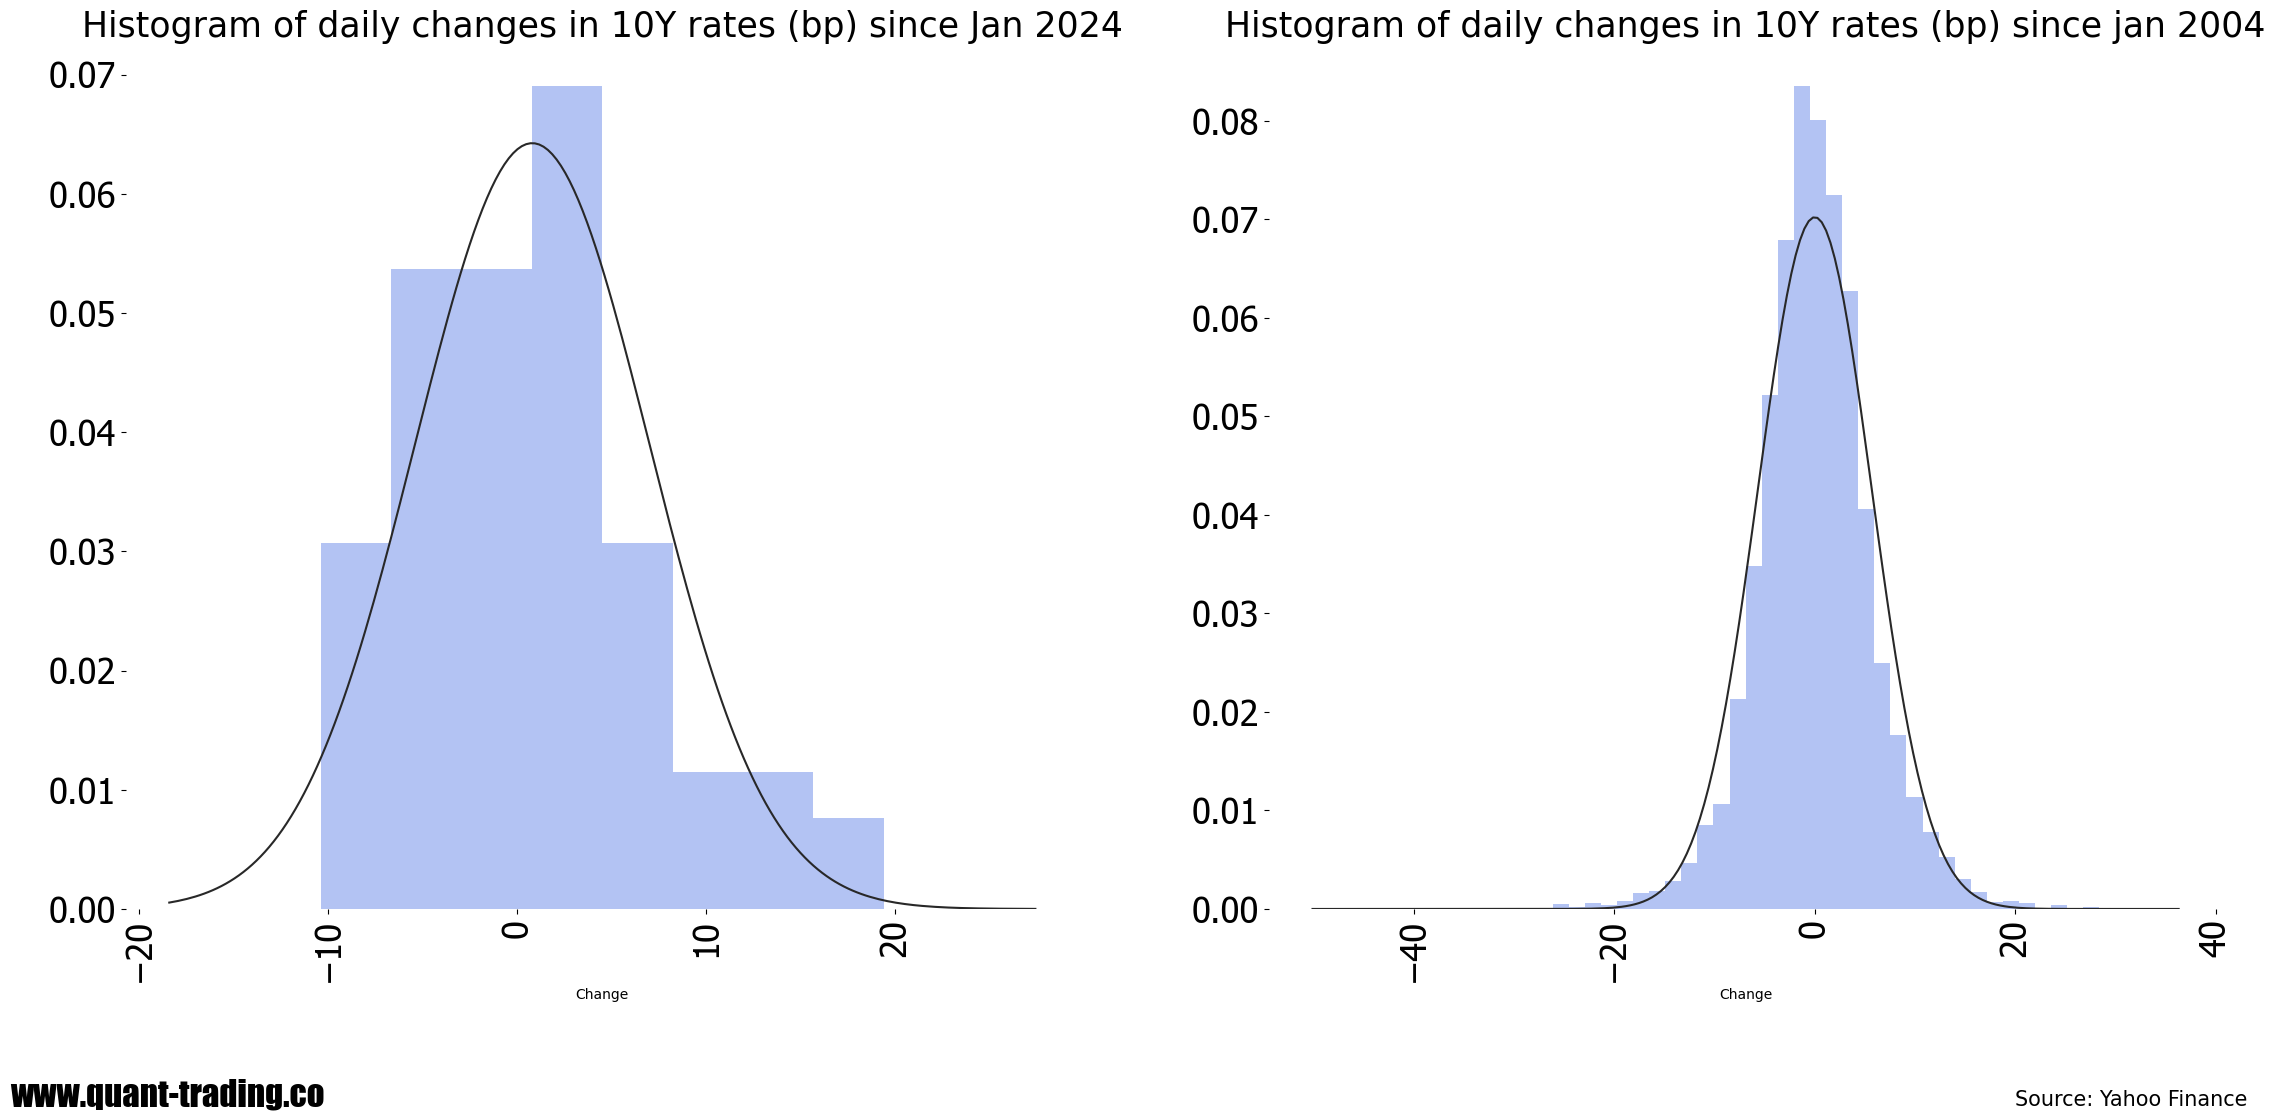

In [7]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.distplot(prices_hist['Change'], fit = stats.norm,  kde=False, color = "royalblue")
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=25)
plt.xticks(fontname = "Tahoma",fontsize=25)
plt.title("Histogram of daily changes in 10Y rates (bp) since Jan 2024", fontsize=25)
plt.box(on=None)

ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.distplot(prices_hist2['Change'], fit = stats.norm, kde=False, color="royalblue")
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=25)
plt.xticks(fontname = "Tahoma",fontsize=25)
plt.title("Histogram of daily changes in 10Y rates (bp) since jan 2004", fontsize=25)
plt.box(on=None)

plt.subplots_adjust(wspace = 0.2,bottom=0.1, right=3.4, top=1.9)

plt.text(-180, -0.02,'www.quant-trading.co' , color='black', fontsize=25,family='Impact')
plt.text(20, -0.02,'Source: Yahoo Finance' , color='black', fontsize=15)

plt.show()

## **Plot the histogram with matplotlib and plot the outliers**

   
<font size="3"> We can also plot a histogram with the matplotlib function hist. You need to specify a few other parameters. We can also use the rugplot function from the seaborn library to plot the outliers. This function is intended to complement other plots by showing the location of individual observations in an unobtrusive way. In this case we will plot all daily changes that are greater than 20 basis points in absolute value. 
<br><br>

In [8]:
min_value2 = prices_hist2['Change'].min()
max_value2 = prices_hist2['Change'].max()

Text(33.20000171661377, -0.02, 'Source: Yahoo Finance')

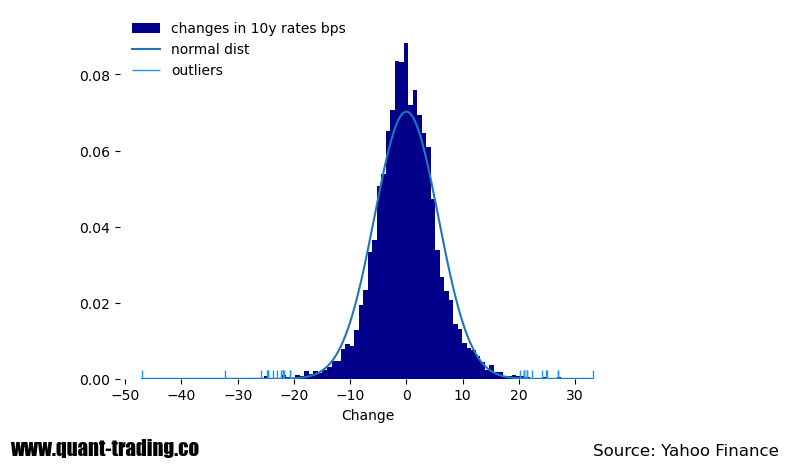

In [9]:
fig = plt.figure()

plt.hist(prices_hist2['Change'],density=True,bins=100,label="changes in 10y rates bps",color="darkblue")
xx = np.linspace(prices_hist2['Change'].min(), prices_hist2['Change'].max(),num = 1000)
plt.plot(xx,stats.norm.pdf(xx,loc=0.0,scale = prices_hist2['Change'].std()),label="normal dist")
outliers = np.abs(prices_hist2['Change'])>20
sns.rugplot(prices_hist2['Change'][outliers],color="dodgerblue",label="outliers")
plt.legend(loc="upper left",frameon=False)
plt.box(on=None)

plt.text(min_value2*1.5, -0.02,'www.quant-trading.co' , color='black', fontsize=15,family='Impact')
plt.text(max_value2, -0.02,'Source: Yahoo Finance' , color='black', fontsize=12)

If this content is helpful and you want to make a donation please click on the button below. It helps us maintain this site.

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)